In [1]:
import os

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from mpl_toolkits.mplot3d import Axes3D

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
import tensorflow as tf

In [9]:
from keras.layers import Input,Dropout,Dense

Using TensorFlow backend.


In [10]:
from keras.models import Model

In [11]:
from keras import regularizers

In [12]:
from keras.utils.data_utils import get_file

In [13]:
from sklearn import metrics

In [14]:
from sklearn.svm import SVC

In [15]:
from sklearn.naive_bayes import BernoulliNB 

In [16]:
from sklearn import tree

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
from sklearn.feature_selection import RFE

In [21]:
import itertools

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
from sklearn.preprocessing import OneHotEncoder 

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nRowsRead = None 

In [26]:
nrows=20000

In [27]:
df1 = pd.read_csv("Dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv", nrows=nrows)

In [28]:
df2=pd.read_csv("Dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv", nrows=nrows)

In [29]:
df3=pd.read_csv("Dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv", nrows=nrows)

In [30]:
df4=pd.read_csv("Dataset/Monday-WorkingHours.pcap_ISCX.csv", nrows=nrows)

In [31]:
df5=pd.read_csv("Dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv", nrows=nrows)

In [32]:
df6=pd.read_csv("Dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv", nrows=nrows)

In [33]:
df7=pd.read_csv("Dataset/Tuesday-WorkingHours.pcap_ISCX.csv", nrows=nrows)

In [34]:
df8=pd.read_csv("Dataset/Wednesday-workingHours.pcap_ISCX.csv", nrows=nrows)

In [35]:
df = pd.concat([df1,df2, df3, df4,df5,df6,df7,df8])

In [36]:
del df1,df2, df3, df4,df5,df6,df7,df8

In [37]:
nRow, nCol = df.shape
print(f'Rows {nRow} Columns {nCol} ')

Rows 48000 Columns 85 


In [38]:
df = df.dropna()

In [39]:
df.columns = df.columns.str.strip()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination Port             6000 non-null   int64  
 1   Flow Duration                6000 non-null   int64  
 2   Total Fwd Packets            6000 non-null   int64  
 3   Total Backward Packets       6000 non-null   int64  
 4   Total Length of Fwd Packets  6000 non-null   int64  
 5   Total Length of Bwd Packets  6000 non-null   int64  
 6   Fwd Packet Length Max        6000 non-null   int64  
 7   Fwd Packet Length Min        6000 non-null   int64  
 8   Fwd Packet Length Mean       6000 non-null   float64
 9   Fwd Packet Length Std        6000 non-null   float64
 10  Bwd Packet Length Max        6000 non-null   int64  
 11  Bwd Packet Length Min        6000 non-null   int64  
 12  Bwd Packet Length Mean       6000 non-null   float64
 13  Bwd Packet Length 

In [41]:
df = df[["Destination Port", "Flow Duration", "Total Fwd Packets", 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Subflow Fwd Packets','Subflow Fwd Bytes','Subflow Bwd Packets', 'Subflow Bwd Bytes','Init_Win_bytes_backward','act_data_pkt_fwd','min_seg_size_forward',"Label"]]

In [42]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Label
0,22,1266342,41,44,2664,6954,41,2664,44,6954,243,24,32,BENIGN
1,22,1319353,41,44,2664,6954,41,2664,44,6954,243,24,32,BENIGN
2,22,160,1,1,0,0,1,0,1,0,243,0,32,BENIGN
3,22,1303488,41,42,2728,6634,41,2728,42,6634,243,24,32,BENIGN
4,35396,77,1,2,0,0,1,0,2,0,290,0,32,BENIGN


In [43]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


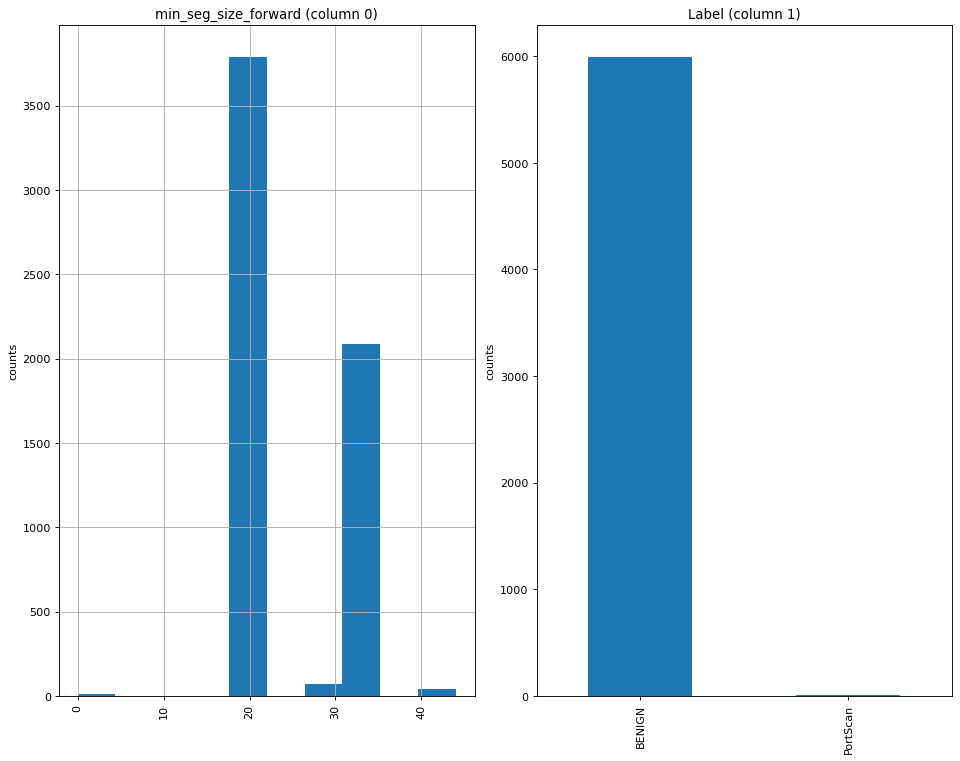

In [44]:
plotPerColumnDistribution(df, 79, 5)

In [45]:
train, test=train_test_split(df,test_size=0.3, random_state=10)

In [46]:
train.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward
count,4200.000000,4.200000e+03,4200.000000,4200.00000,4200.000000,4.200000e+03,4200.000000,4200.000000,4200.00000,4.200000e+03,4200.000000,4200.000000,4200.0000
mean,6053.227143,1.100050e+07,6.928810,6.83381,468.881429,6.260041e+03,6.928810,468.881429,6.83381,6.260041e+03,1703.827381,4.371667,24.4000
std,15971.476186,3.033010e+07,33.225477,47.30466,1683.700991,7.947149e+04,33.225477,1683.700991,47.30466,7.947149e+04,7916.773588,25.227636,5.9388
min,0.000000,0.000000e+00,1.000000,0.00000,0.000000,0.000000e+00,1.000000,0.000000,0.00000,0.000000e+00,-1.000000,0.000000,0.0000
25%,53.000000,1.790000e+02,1.000000,1.00000,37.000000,6.000000e+00,1.000000,37.000000,1.00000,6.000000e+00,-1.000000,0.000000,20.0000
50%,80.000000,3.113800e+04,2.000000,2.00000,68.000000,1.310000e+02,2.000000,68.000000,2.00000,1.310000e+02,-1.000000,1.000000,20.0000
75%,443.000000,2.794248e+05,4.000000,2.00000,156.000000,3.220000e+02,4.000000,156.000000,2.00000,3.220000e+02,240.000000,3.000000,32.0000
max,64253.000000,1.199989e+08,1301.000000,1649.00000,34076.000000,3.122560e+06,1301.000000,34076.000000,1649.00000,3.122560e+06,65535.000000,867.000000,44.0000


In [47]:
test.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward
count,1800.000000,1.800000e+03,1800.000000,1800.000000,1800.000000,1.800000e+03,1800.000000,1800.000000,1800.000000,1.800000e+03,1800.000000,1800.000000,1800.000000
mean,5938.246111,1.066797e+07,6.393889,6.375556,383.089444,6.293958e+03,6.393889,383.089444,6.375556,6.293958e+03,1541.943889,4.063889,24.355556
std,15841.767396,3.025741e+07,21.136415,28.971111,1394.740520,5.459618e+04,21.136415,1394.740520,28.971111,5.459618e+04,7724.486071,16.675426,5.935939
min,0.000000,1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,-1.000000,0.000000,0.000000
25%,53.000000,1.870000e+02,1.000000,1.000000,41.000000,6.000000e+00,1.000000,41.000000,1.000000,6.000000e+00,-1.000000,0.000000,20.000000
50%,53.000000,3.094200e+04,2.000000,2.000000,68.000000,1.320000e+02,2.000000,68.000000,2.000000,1.320000e+02,-1.000000,1.000000,20.000000
75%,443.000000,2.144545e+05,4.000000,2.000000,142.500000,3.205000e+02,4.000000,142.500000,2.000000,3.205000e+02,182.500000,3.000000,32.000000
max,64253.000000,1.199574e+08,474.000000,579.000000,23205.000000,1.191676e+06,474.000000,23205.000000,579.000000,1.191676e+06,65535.000000,313.000000,44.000000


In [48]:
train['Label'].value_counts()
test['Label'].value_counts()

BENIGN      1798
PortScan       2
Name: Label, dtype: int64

In [49]:
scaler = StandardScaler()

In [50]:
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

In [51]:
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [52]:
onehotencoder = OneHotEncoder() 

In [53]:
trainDep = train['Label'].values.reshape(-1,1)
trainDep = onehotencoder.fit_transform(trainDep).toarray()
testDep = test['Label'].values.reshape(-1,1)
testDep = onehotencoder.fit_transform(testDep).toarray()

In [54]:
train_X=sc_traindf
train_y=trainDep[:,0]

In [55]:
test_X=sc_testdf
test_y=testDep[:,0]

In [56]:
rfc = RandomForestClassifier()

In [57]:
rfc.fit(train_X, train_y)

RandomForestClassifier()

In [58]:
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_X.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

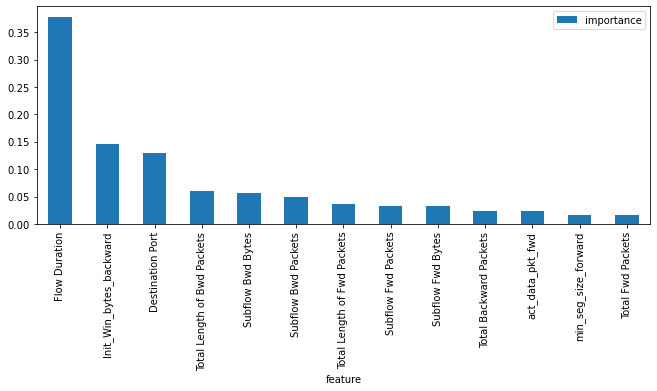

In [59]:
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar()

In [60]:
rfc = RandomForestClassifier()

In [61]:
rfe = RFE(rfc, n_features_to_select=20)
rfe = rfe.fit(train_X, train_y)

In [62]:
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_X.columns)]

In [63]:
selected_features = [v for i, v in feature_map if i==True]

In [64]:
selected_features

['Destination Port',
 'Flow Duration',
 'Total Fwd Packets',
 'Total Backward Packets',
 'Total Length of Fwd Packets',
 'Total Length of Bwd Packets',
 'Subflow Fwd Packets',
 'Subflow Fwd Bytes',
 'Subflow Bwd Packets',
 'Subflow Bwd Bytes',
 'Init_Win_bytes_backward',
 'act_data_pkt_fwd',
 'min_seg_size_forward']

In [65]:
a = [i[0] for i in feature_map]
train_X = train_X.iloc[:,a]
test_X = test_X.iloc[:,a]

In [66]:
X_train,X_test,Y_train,Y_test = train_test_split(train_X,train_y,train_size=0.70, random_state=2)

In [67]:
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

In [68]:
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

In [69]:
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

BernoulliNB()

In [70]:
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [71]:
models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

In [72]:
for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()

C:\Users\kanna\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\kanna\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kanna\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\kanna\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less tha


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.996938775510204

Model Accuracy:
 0.998639455782313

Confusion matrix:
 [[   0    4]
 [   0 2936]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       1.00      1.00      1.00      2936

    accuracy                           1.00      2940
   macro avg       0.50      0.50      0.50      2940
weighted avg       1.00      1.00      1.00      2940



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9986394557823131

Model Accuracy:
 1.0

Confusion matrix:
 [[   4    0]
 [   0 2936]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00      2936



C:\Users\kanna\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kanna\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\kanna\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        

C:\Users\kanna\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.9992063492063492

Confusion matrix:
 [[   0    1]
 [   0 1259]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       1.00      1.00      1.00      1259

    accuracy                           1.00      1260
   macro avg       0.50      0.50      0.50      1260
weighted avg       1.00      1.00      1.00      1260



============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.9984126984126984

Confusion matrix:
 [[   1    0]
 [   2 1257]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.33      1.00      0.50         1
         1.0       1.00      1.00      1.00      1259

    accuracy                           1.00      1260
   macro avg       0.67  

C:\Users\kanna\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kanna\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
def getModel():
    inp = Input(shape=(X_train.shape[1],))
    d1=Dropout(0.3)(inp)
    encoded = Dense(8, activation='relu', activity_regularizer=regularizers.l1(10e-5))(d1)
    decoded = Dense(X_train.shape[1], activation='relu')(encoded)
    autoencoder = Model(inp, decoded)
    autoencoder.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
    return autoencoder

In [76]:
autoencoder=getModel()

In [77]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [78]:
history=autoencoder.fit(X_train, Y_train,
               epochs=32,
                batch_size=150,
                shuffle=True,
                validation_split=0.1, callbacks=[callback]
                       )

Train on 2646 samples, validate on 294 samples
Epoch 1/32
2646/2646 [==============================] - 0s 48us/step - loss: 7.3123 - accuracy: 0.1353 - val_loss: 8.7093 - val_accuracy: 0.4252
Epoch 2/32
2646/2646 [==============================] - 0s 13us/step - loss: 6.8396 - accuracy: 0.3662 - val_loss: 8.2286 - val_accuracy: 0.4320
Epoch 3/32
2646/2646 [==============================] - 0s 12us/step - loss: 6.5333 - accuracy: 0.5011 - val_loss: 7.7813 - val_accuracy: 0.4388
Epoch 4/32
2646/2646 [==============================] - 0s 15us/step - loss: 6.1831 - accuracy: 0.5499 - val_loss: 7.3730 - val_accuracy: 0.4592
Epoch 5/32
2646/2646 [==============================] - 0s 13us/step - loss: 5.5852 - accuracy: 0.5771 - val_loss: 6.5134 - val_accuracy: 0.4864
Epoch 6/32
2646/2646 [==============================] - 0s 14us/step - loss: 5.0380 - accuracy: 0.6024 - val_loss: 5.6225 - val_accuracy: 0.5272
Epoch 7/32
2646/2646 [==============================] - 0s 13us/step - loss: 3.9786

Text(0.5, 0, 'epoch')

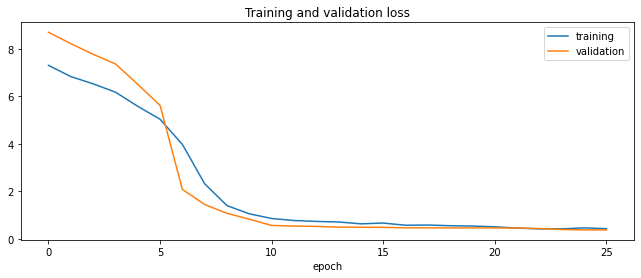

In [79]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

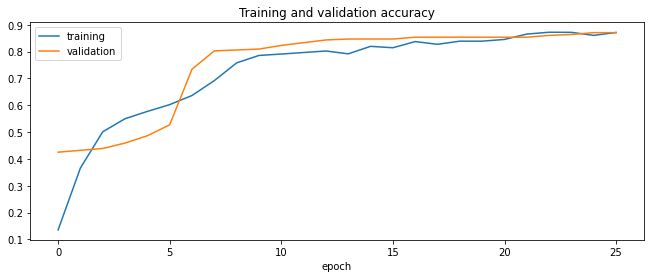

In [80]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')